Initial Setup and Loading the Data

We begin by preparing our environment, importing essential libraries like Pandas, NumPy, Matplotlib, and Seaborn.

To use the dataset involves loading it. This process includes previewing the data, understanding the types of data we have and identifying any missing values.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('Titanic.csv')

# Check for null values in the entire DataFrame
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
# Check if any null values exist in each column
print(df.isnull().any())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


In [10]:
# Handling missing values in Age

median_age = df['Age'].median()

df['Age'].fillna(median_age, inplace=True)

In [ ]:
# Handling missing values in Cabin (dropping the column)
df.drop('Cabin', axis=1, inplace=True)

In [12]:
# Handling missing values in Embarked(only a few missing values.)
mode_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_embarked, inplace=True)

In [13]:
# Verify that there are no more missing values
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [28]:
#stats summary

print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


Exploratory Data Analysis

Here, we start delve into each variable individually, in-pairs or multivariable. This involves examining distributions for numerical features and frequency counts for categorical features.

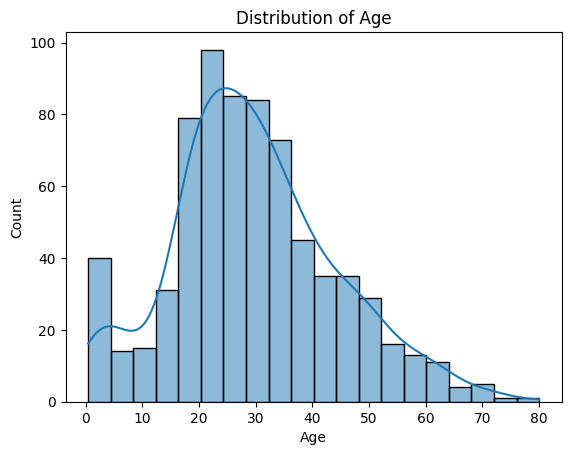

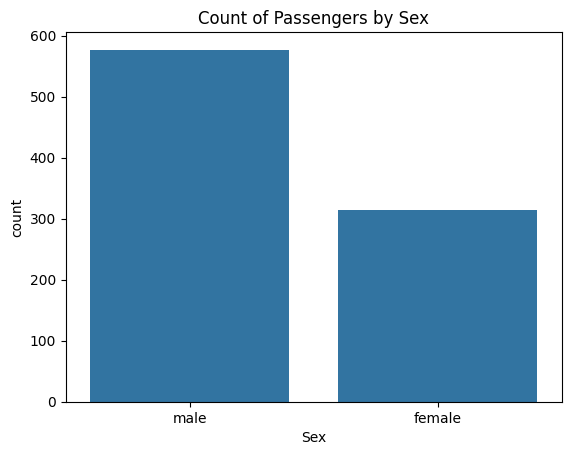

Text(0, 0.5, 'Number of Passengers')

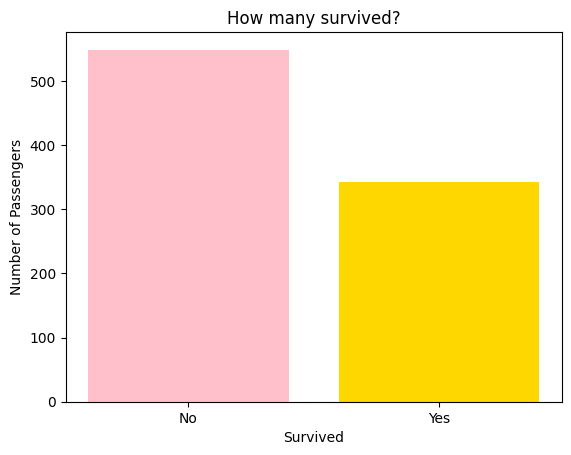

In [22]:
# Univariate Analysis to visualize the frequency of categories for categorical variables.
#age-count
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()

#sex-count
sns.countplot(data=df, x='Sex')
plt.title('Count of Passengers by Sex')
plt.show()

#survived or not
# Calculate the counts of survived and not survived
survival_counts = df['Survived'].value_counts().sort_index()
colors = ['pink', 'gold']
plt.bar(survival_counts.index, survival_counts, color=colors)

# Adding titles and labels
plt.title('How many survived?')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')

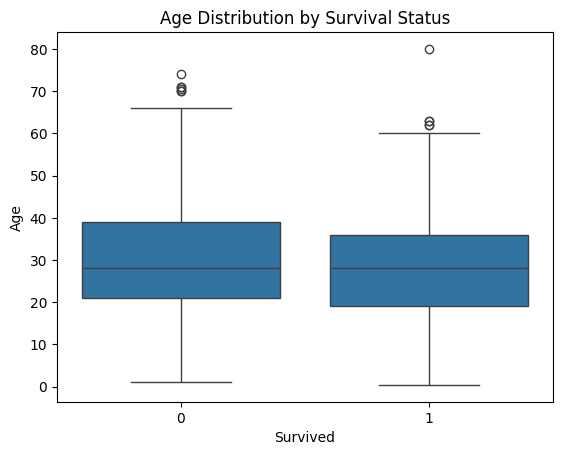

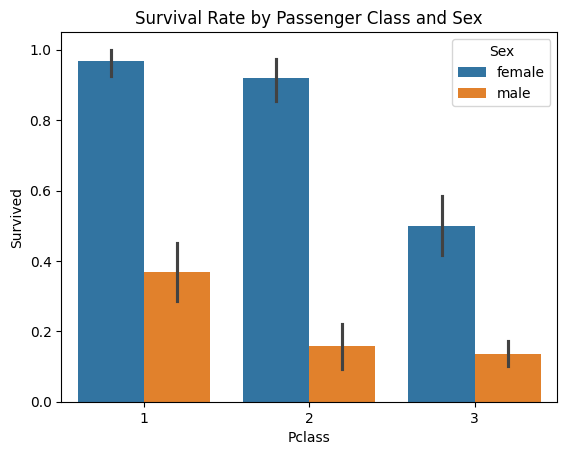

In [26]:
# Bivariate Analysis
sns.boxplot(data=df, x='Survived', y='Age')
plt.title('Age Distribution by Survival Status')
plt.show()

sns.barplot(data=df, x='Pclass', y='Survived', hue='Sex')
plt.title('Survival Rate by Passenger Class and Sex')
plt.show()

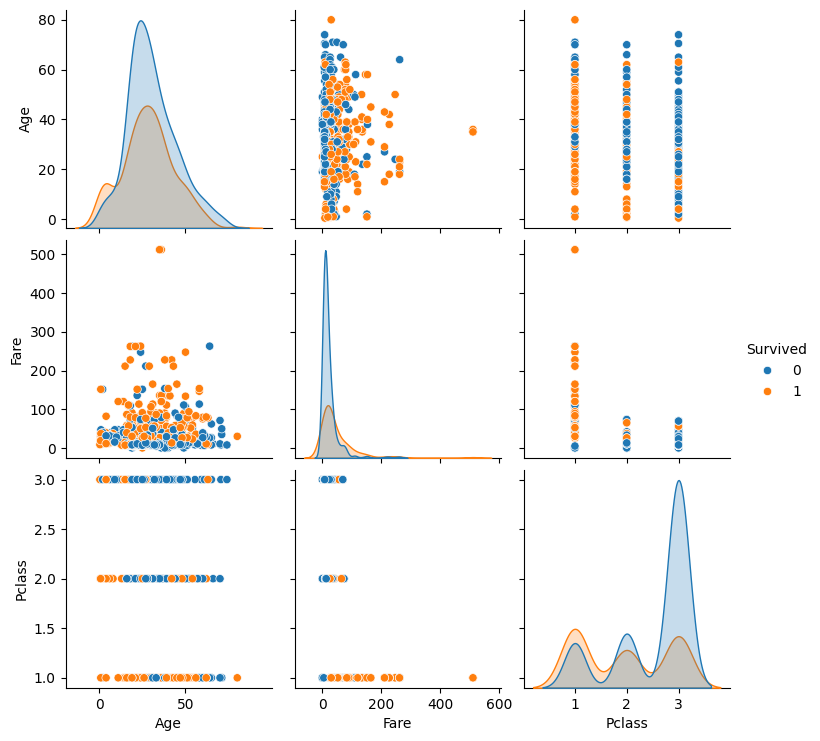

In [27]:
# Multivariate Analysis
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived')
plt.show()